## Observations and Insights 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset - 249 mice in metadata - 1893 rows in results. 
combined = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined[combined.duplicated(["Mouse ID", "Timepoint"])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = combined.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
ramicane = clean.loc[clean["Drug Regimen"] == "Ramicane"]
mean = np.mean(ramicane["Tumor Volume (mm3)"])
median = np.median(ramicane["Tumor Volume (mm3)"])
variance = np.var(ramicane["Tumor Volume (mm3)"])
standard_deviation = np.std(ramicane["Tumor Volume (mm3)"])
summary = pd.DataFrame({"Mean": [mean], 
                        "Median": median, 
                        "Variance": variance, 
                        "Standard Deviation": standard_deviation})
summary

,Mean,Median,Variance,Standard Deviation
0,40.216745,40.673236,23.383692,4.835669


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
grouped = clean.groupby(["Drug Regimen"])
grouped["Tumor Volume (mm3)"].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

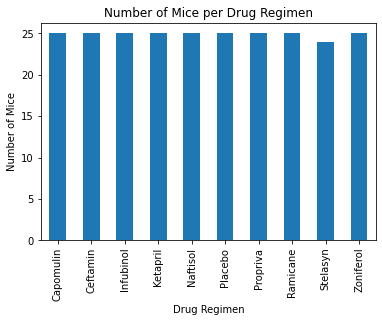

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout  
# the course of the study using pandas. 
treatment_group = clean.groupby(["Drug Regimen"])
treatment_number = treatment_group["Mouse ID"].nunique()
treatment_chart = treatment_number.plot(kind="bar", title="Number of Mice per Drug Regimen")
treatment_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()

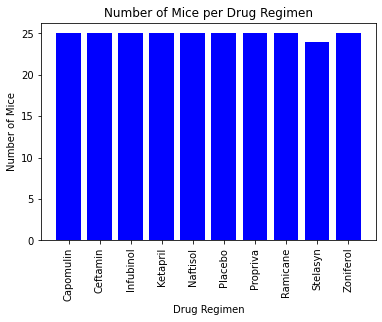

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
# the course of the study using pyplot.
number = [25, 25, 25, 25, 25, 25, 25, 25, 24, 25]
x_axis = np.arange(len(number))
plt.bar(x_axis, number, color="blue", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", 
                            "Naftisol", "Placebo", "Propriva", "Ramicane",
                            "Stelasyn", "Zoniferol"], rotation="vertical")
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()
plt.tight_layout()

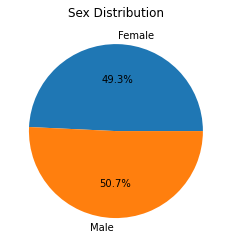

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = clean.groupby(["Sex"])
sex_number = sex_group["Sex"].count()
sex_number.plot(kind="pie", title="Sex Distribution", autopct="%1.1f%%")
plt.ylabel("")

plt.show()
plt.tight_layout()

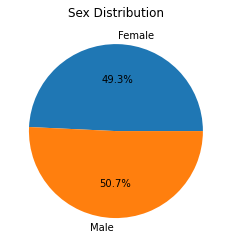

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female", "Male"]
values = [930, 958]
plt.pie(values, labels=sex, autopct="%1.1f%%")
plt.title("Sex Distribution")

plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = clean.groupby("Mouse ID")
mouse_max = mouse_group["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = pd.merge(clean, mouse_max, how="inner", on="Mouse ID")
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
     
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

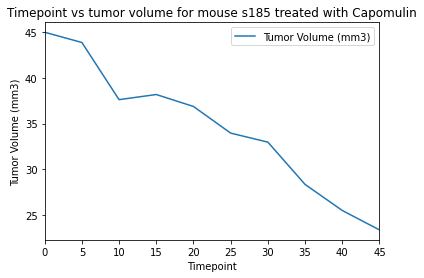

<Figure size 432x288 with 0 Axes>

In [60]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean.loc[clean["Drug Regimen"] == "Capomulin"]
mouse = capomulin.loc[capomulin["Mouse ID"] == "s185"]
mouse.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", title="Timepoint vs tumor volume for \
mouse s185 treated with Capomulin")

plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, 45)
plt.show()
plt.tight_layout()

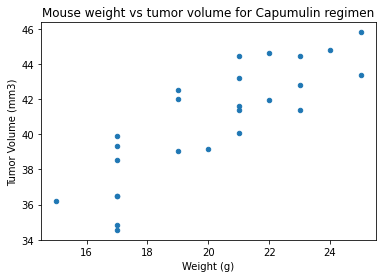

<Figure size 432x288 with 0 Axes>

In [58]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
grouped_capomulin = capomulin.groupby("Mouse ID")
volume = grouped_capomulin["Tumor Volume (mm3)"].mean()
weight = grouped_capomulin["Weight (g)"].mean()
table = pd.merge(volume, weight, how="inner", on="Mouse ID")
table.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Mouse weight vs \
tumor volume for Capumulin regimen")

plt.show()
plt.tight_layout()

## Correlation and Regression

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(volume, weight)
print(f"The correlation coefficient between tumor volume and weight is {round(correlation[0],2)}.")

The correlation coefficient between tumor volume and weight is 0.84.


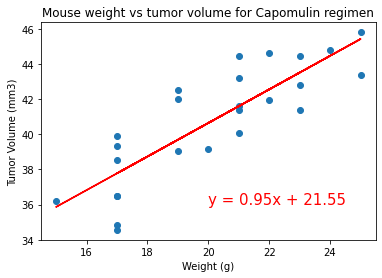

In [57]:
x_values = weight
y_values = volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Mouse weight vs tumor volume for Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()